# 문제정의

2015년 후생노동청에서 일본인구동태통계에 의하면 사망자의 약60%가 생활습관병이 원인이 되고있습니다.  
생활습관병은 불규칙한 식습관과 수면패턴이 주로 원인이 되고있으며, 대표적인 생활습관병으로는 고혈압, 당뇨병, 치매등이 있습니다.  
특히, 세계적으로도 당뇨병자수가 급증하고있으며, 국제당뇨병연합은 2045년에 환자수가 6.3억명으로 증가한다고 예상하고있습니다.  
초기에 발견되지 않는다면 합병증인 뇌경색이나 심근경색증등이 발생될 수 있습니다.  

- 통계가 무엇인지  (현황판)
- 당뇨병
- 합병증 (뇌경색, 심근경색증)


## 그림1. 사망원인 - 생활습관병

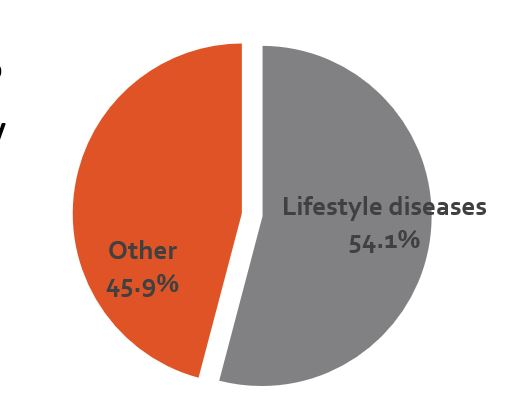

In [1]:
from IPython.display import Image
Image("data/related-disease.JPG")


# 데이터 설명

Pima Indian 데이터는 21살 이상의 여성을 대상으로 하여 정상인 500명과 당뇨병환자 268명으로 총 768명에 대한 데이터입니다.  
데이터 항목으로는 임신횟수, 글루코스, 혈압, 피부두께, 인슐린, BMI, 당뇨병유전지수, 연령으로 총 8개의 항목으로 이루어져있는 데이터 입니다. 


In [9]:
# 데이터 가져오기
import pandas as pd

df = pd.read_excel("pima_data.xlsx")

print("Data Size:",len(df))

df.describe()

Data Size: 768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 데이터 전처리

데이터의 전처리로는 1-class SVM을 이용해서 10퍼센트(nu = 0.9)의 이상치를 제거하였습니다.
Matlab R2019a를 이용해서 정상인과 당뇨병환자를 나누어서 이상치를 검출하였습니다.
그 결과, 정상인 452명, 당뇨병환자 243명에 대한 분석을 진행하게 되었습니다.



In [3]:
# 데이터 가져오기
import pandas as pd

f_path = r"C:\Users\KIM\Desktop\1-class svm_pima.xlsx"
df = pd.read_excel(f_path)
df

,pregnancies,glucose,bloodpressure,skin thickness,insulin,BMI,diabetes pedigree function,age,outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,1,89,66,23,94,28.1,0.167,21,0
2,5,116,74,0,0,25.6,0.201,30,0
3,10,115,0,0,0,35.3,0.134,29,0
4,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
690,1,128,88,39,110,36.5,1.057,37,1
691,0,123,72,0,0,36.3,0.258,52,1
692,6,190,92,0,0,35.5,0.278,66,1
693,9,170,74,31,0,44.0,0.403,43,1


### 기초분석

기초분석으로 t검정과 상관분석으로 분석하였습니다.
t검정의 결과로 등분산이 동일하다고 가정되는 조건으로 혈압과 피부두께가 0.05보다 크기 때문에 유의미하지 않다고 판단되었습니다.
즉, 정상인과 당뇨병환자사이의 차이가 그다지 없고 동일하다고 판단 되었습니다.
상관분석으로 요인간의 관련성을 검증할 수 있습니다.
당뇨병에 상관없이 피부두께와 인슐린, 임신횟수와 연령은 관련이 있다고 알 수 있습니다.
정상인과 달리 당뇨병환자에게는 피부두께와 BMI와의 상관수치가 낮은 결과를 알 수 있습니다.


# 문제 해결방법
머신러닝 기법을 이용하여 모델을 만든다

# 1. 그래피컬라소
        
그래피컬라소는 다변량정규분포의 복잡한구조인 파라미터를 그래프구조로서 변형시켜 이상감지를 추출할수있는 방법중의 하나입니다.  
집단간의 이상감지와 요인간의 의존관계를 효율적으로 분석할 수 있는게 가장 큰 장점입니다.  
또, 그래프구조에서의 요인간의 변화를 확인하고 각 요인에 대한 변화값도 비교할 수 있습니다.  
Pima Indian 중에서 정상인과 당뇨병 환자를 구분해서 그래피컬라소로 나타내어 당뇨병 환자에게는 요인간의 관계를 파악하고 정상인과의 다른점을 비교할 수 있습니다.
그리고 당뇨병에 있어서 영향이 큰 요인을 조사하기 위해 정상인에서 당뇨병환자에서의 각 요인의 변화도를 측정하였습니다.  
그래프상으로 보면 당뇨병환자한테 피부두께와 혈압, 피부두께와 당뇨병유전지수, BMI와연령간의 의존관계를 확인하였습니다.  
특히, BMI와 연령은 변화값도 높은 결과가 나왔습니다.  
        
    
(변수간의 관계성을 그래프로 표시할수있어 변수간의 특징이나 차이점을 쉽게 알 수 있다. 또, 각 항목간의 상관이 있으면 그래프상에 선을 표시해서 변수간의 상관성을 확인 할수도있다.) 

# 2. 주성분분석
주성분분석을 이용해서 8개의 요인을 제1~3성분으로 축소할 수 있습니다.
각 성분마다 크게 차지하는 요인들로 분류
당뇨병환자 기준으로 제 1성분에는 피부두께, BMI, 당뇨병유전지수이고, 제 2성분에는 임신횟수, 연령, 혈압이고,  
제 3성분에는 글루코스, 인슐린으로 이루어져 있습니다.  
즉, 식생활등의 생활환경으로 인한 비만이나 연령의 영향이 크다고 생각될 수 있습니다.
IBM SPSS Statics 25를 이용해서 주성분 분석을 실행하였습니다.

### 3. 클러스터분석
각 요인들의 특성이나 성질이 비슷하면 군집을 이루는 성질을 이용해서 8개의 요인들을 군집화하였습니다.  
클러스터 분석으로는 계층적 클러스터분석법중의 하나인 Ward법을 이용하였습니다.  
당뇨병 환자 기준으로 3개로 군집이 이루어져 있으며, 제 1 군집으로 임신횟수, 피부두께, 혈압, BMI, 당뇨병유전지수이고   
제 2군집으로 글루코스이고 제3군집으로 인슐린으로 이루어져 있습니다.   
클러스터 분석결과로 당뇨병환자들은 나이가 많을수록 살이 찌기가 쉽고 유전력이 있다는 결과를 얻을 수있습니다.

### 4. 결정트리
각 요인의 중요도를 측정하기위해서 이 모델을 이용하게 되었습니다.  
결정트리 모델을 이용한 결과, 글루코스와 BMI, 연령이 중요도가 높게 측정되었습니다.

### 5. 서포트백터머신
각 요인이 미치는 영향을 조사하기 위해서 서포트백신을 이용해 각요인을 1개씩 제거하여 나머지 7개에 대한 정확도를 측정하였습니다.  
요인의 영향도가 크면 그만큼 7개에 대한 정확도가 낮을 것 입니다.  
8개의 요인중에 글루코스를 뺀 나머지 7개의 요인에대한 정확도가 약69%로 나오며 다른 요인들과 비교해서 현저히 낮은결과가 나왔습니다.  
당뇨병 환자들한테 있어서 글루코스의 영향도가 크다고 생각 할 수 있습니다.  

# 성능측정 Performance Metric
그 모델이 어떤 모델인지 (그래피컬 라소란?) - 보통 어느때에 사용이 많이 되고 어느 데이터에 효과적이다

In [ ]:
위에서의 분석결과를 참고하여 글루코스관련요인, 비만관련요인, 연령에 따른 요인이 당뇨병에 있어서 중요한 요인이라고 판단 되었습니다.
따라서, 3개의 요인들만으로의 성능도를 측정하고 전체 성능도와도 비교하였습니다.
데이터를 랜덤으로 학습용과 검증용 데이터 7:3으로  설정하였습니다.



# 결과

결과가 가져오는 이점

In [ ]:
여러가지 모델을 사용해서 성능도를 측정한 결과 제안한 3개의 요인들만으로도 동등이상의 높은 예측성능도를 얻을 수 있습니다.
당뇨병에 있어서 이 3개의 요인들이 영향이 크기때문에 주의할 필요가 있습니다.
